# Cosmology HW3
## Dino Bektesevic 08.05.2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import astropy.units as u
%matplotlib inline

# 1 Short answers on cooling

## a) Gas in a $10^{15}M_⊙$ halo tends to trace the dark matter and not cool. Show that the cooling time $t_c =E/\dot E$ is much longer than the age of the Universe for gas at the characteristic density of the dark matter halo.

$$\begin{align}
t &= \frac{E}{\dot E} \\
&= \frac{3/2 nk_B T}{\Lambda n^2} \\
&= \frac{3/2 k_B T}{1.4\cdot 10^{-27} \sqrt{T} n} \\
& = \frac{3}{2} \frac{ k_B \sqrt{c_T \frac{T}{c_T}}}{1.4\cdot 10^{-27} c_n \frac{n}{c_n}} \\
& = \frac{3 k_B}{2} \frac{\sqrt c_T}{1.4\cdot 10^{-27} c_n} \sqrt{\frac{T}{c_T}} \left(\frac{n}{c_n}\right)^{-1} \\
\end{align}$$

Since its a very massive halo we can take $z\approx 0$ which then gives us the temperature of the order of magnitude

$$T_{vir} = 10^6K (1+z) \left(\frac{M}{10^{12} M_{sol}}\right)^{\frac{2}{3}} \approx 10^6 \left(10^3\right)^{2/3}K \approx 10^8K$$

$$ n_{halo} = 4\cdot 10^{-5} (1+z)^3 cm^{-3} = 4\cdot 10^{-5} cm^{-3} $$

Plugging it all in (converting Boltzman's constant to cms as well):

$$\begin{align}
t \approx \frac{10^{-16} \sqrt{10^8K}}{10^{-27} 10^{-5}} \sqrt{\frac{T}{c_T}} \left(\frac{n}{c_n}\right)^{-1} \\
t \approx 10^{11}\frac{\sqrt{10^8K}}{10^{-5}} \sqrt{\frac{T}{c_T}} \left(\frac{n}{c_n}\right)^{-1} \\
t \approx 10^{18.8}s \approx 10^{11}yr \approx 100Gyr
\end{align}$$

which is a 100 times the age of the universe.

## b) Do you expect the first galaxies to form earlier or later if Almighty Dino made i) the electron somewhat heavier 1 or ii) the proton somewhat more massive.

The energy of atomic transition is approximately given by:
$$E = Ry \left(\frac{1}{n_2} - \frac{1}{n_1}\right)$$
where $Ry$ is the Rydberg constant, related to fine structure constant as:
$$Ry = \frac{\alpha^2 m_e c}{4\pi \hbar}$$
from which the following wavelength expression comes from:
$$\frac{1}{\lambda} = \frac{m_ec^4}{8\epsilon_0 h^3 c}\left( \frac{1}{n_2} - \frac{1}{n_1}\right)$$

So the more massive the electron the more energy it is required to make the transition and ionize the Hydrogen atom. The more energy it takes to ionize the Hydrogen atom the longer we have to wait because $t=E/\dot E \approx (10^{-6}T)^2 \rightarrow 10^{6}\sqrt t$ because its the gas collaping into a galaxy that heats it up. So because of that additional waiting time I predict we will form galaxies later because the increase in temperature goes as a square root of time but the change in energy is directly proportional to change in mass $(kT)/(kT') = E/E' = m_e/m_e'$. 

# 2) growth of structure 

## a) Draw a qualitative picture of what the late-time linear matter power spectrum would look like if at an early time the Universe was matter dominated and then became radiation dominated, before again becoming matter dominated again at z = 3000.

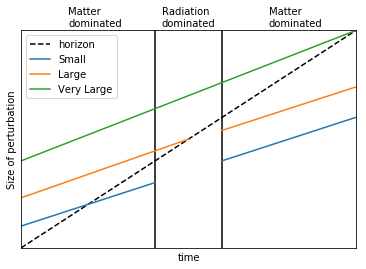

In [2]:
plt.vlines(3000, -2000, 14000)
plt.vlines(2000, -2000, 14000)

plt.text(700, 5100, 'Matter\ndominated')
plt.text(2100, 5100, 'Radiation\ndominated')
plt.text(3700, 5100, 'Matter\ndominated')

plt.plot([0, 5000], [0, 5000], ls='--', color='black', label='horizon')

plt.plot([0, 2000], [500, 1500], color='C0', label='Small')
plt.plot([3000, 5000], [2000, 3000], color='C0')

plt.plot([0, 2500], [1150, 2500], color='C1', label='Large')
plt.plot([3000, 5000], [2700, 3700], color='C1')

plt.plot([0, 5000], [2000, 5000], color='C2', label='Very Large')
#plt.plot([0, 2000], [1000, 2000], color='orange', label='Large pert.')


plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])

plt.xlabel("time")
plt.ylabel("Size of perturbation")
plt.ylim(0, 5000)
plt.xlim(0, 5000)
plt.legend()

The power spectrum would then look like:

(0, 5000)

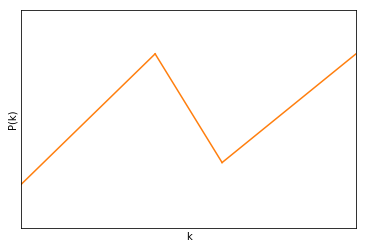

In [3]:
plt.plot([0, 2000], [1000, 4000], color='C1')
plt.plot([2000, 3000], [4000, 1500], color='C1')
plt.plot([3000, 5000], [1500, 4000], color='C1')

plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])

plt.xlabel("k")
plt.ylabel("P(k)")
plt.ylim(0, 5000)
plt.xlim(0, 5000)

## b) How does this new power spectrum potentially change dark matter halo formation? 

Dark matter halos can be very small so that would make them very affected. There would be many more very small dark matter halos formed.

## c) What is the maximum halo mass that can be significantly affected by early matter domination given that the Universe cannot be matter dominated during Big Bang Nucleosynthesis? 

In [4]:
#cosmological parameters
h = 0.7
OmegaM=0.3
OmegaL = 1- OmegaM  #assumes flat
lightspeed = 3e5  #km/s

#Hubble function
def Hz(z):
    return 100*h*(OmegaM*(1+z)**3+OmegaL)**.5

def Hz(z):
    return 70*(1+z)**(3/2)

def dConfDistdz(z):
    return 1/Hz(z)

#conformal distance
def Dconf(z1, z2):
    tmpf = lambda z1, z2: lightspeed*integrate.quad(dConfDistdz, z1, z2)[0]
    vectmpf = np.vectorize(tmpf)
    return vectmpf(z1, z2)

r = Dconf(500000000, np.inf)
rhoavg = 9.9 * 10**(-30) * u.g/u.cm**3

Enclosed mass must be less than mass in the horizon at bbn cca. 100s or z = 500 10^6

$$\begin{align}
M_{enc} = \frac{4}{3} \pi d_H^3 \bar\rho \\
M_{enc} = \frac{4}{3} \pi \bar\rho \int_\infty^{500\cdot 10^6} \left(\frac{c}{H}\right)^3 dz \\
\end{align}$$

So we can write:

In [5]:
((r*u.Mpc)**3 * rhoavg).to(u.M_sun)

<Quantity 2.24246307e-08 solMass>

## d) Do you expect a period of early matter domination to affect the formation of the first stars and galaxies?

Yes. Smaller scales seem to be allowed to grow more freely if thre is a period of early matter domination. Especially it seems as if stars could be seeded by this grow, not so much for galaxies.

# 3. Mass Fluctuations

## a) What are the dimensions of P and A? 

From 

$$\begin{align}
\delta(x) &= \frac{\rho}{\bar\rho} - 1 \\
VP(k) &= |\tilde\delta(k)^2|
\end{align}$$

Since the Fourier transform is given as: 
$$F(k) = \int f(x)e^{-ikx}d^3x$$

we see that $P(k)$ has to have units of volume, as the remaining quantities in the integral are unitless. Since $s$ is in $Mpc$ that means $A$ must be given in $Mpc^4$.

## a1) What is the wavenumber at which P peaks and what does this peak physically correspond to?

$$\begin{align}
\frac{d}{dk} P(k) &= \frac{d}{dk} \frac{Ak}{\left(1+ \left(\frac{ks}{2\pi}\right)^2\right)^2} \\
0 &= \frac{16\pi^4A(4\pi^2 - 3s^2k^2)}{(s^2k^2 + 4\pi^2)^3} \\
\rightarrow 4\pi^2 - 3s^2k^2 = 0 \\ 
\rightarrow (s^2k^2 + 4\pi^2)^3 != 0 \\
\end{align}$$

From the first implied condition we have:

$$\begin{align}
4\pi^2 - 3s^2k^2 &= 0 \\
k^2 &= \frac{4}{3}\left(\frac{\pi}{s}\right)^2  \\
\end{align}$$

as long as k is not one of the zero points of the second condition. In 1/kpc, the $P$ peaks at $k\approx11$ for a lower order-of-magnitude estimate of $H_0$ - which is allowable because in the question it is clearly mentioned that the unitless Hubble constant parameterization was used primarily when the uncertainty on the values were great. Compared to [this plot](https://ned.ipac.caltech.edu/level5/Sept11/Norman/Figures/figure2.jpg) that looks pretty good.

In [6]:
np.sqrt(4/3 * np.pi**2/(200/0.6)**2)

0.010882796185405306

Since $k=1/\lambda$ we have $\lambda \approx 100 h^{-1}Mpc$ or about $\lambda \approx 200 Mpc$ which is quite large, about 10 times as large as the Local Group and about on par to the largest superclusters we know of, i.e. Laniakea. So effectively these scales trace out the original dark matter fillaments on the largest scales.

## b) Consider a window whose Fourier transform is unity inside of a radius K and zero outside (i.e. one at k < K and zero at k > K). For this filter, compute σ as a function of K and hence of R.

From defintiion:

$$\begin{align}
\sigma^2 & = \frac{1}{2\pi^2}\int_0^\infty dk k^2 P(k) \left|W(k)\right|^2 \\
& = \frac{1}{2\pi^2}\int_0^K dk\frac{Ak^3}{\left(1+ \left(\frac{ks}{2\pi}\right)^2\right)^2} \\
& = \frac{A}{2\pi^2}\frac{1 + \frac{1}{1 + sK^2} + \ln{(1 + sK^2)}}{2s^2}
\end{align}$$

## b1) Compute the limits of σ for small and large K

Small limit:

$$\begin{align}
\lim_{K\rightarrow 0}{\left(  \frac{A}{4\pi^2}\frac{1 + \frac{1}{1 + sK^2} + \ln{(1 + sK^2)}}{2s^2}  \right)} &=  \lim_{K\rightarrow 0}\frac{A}{(2\pi s)^2}  + \frac{A}{(2\pi s)^2}\lim_{K\rightarrow 0}\frac{1}{(1 + sK^2)} + \frac{A}{(2\pi s)^2}\lim_{K\rightarrow 0}\ln{(1 + sK^2)} \\
&= \frac{A}{4(\pi s)^2}  + \frac{A}{4(\pi s)^2} + 0 \\
&= \frac{A}{2(\pi s)^2}
\end{align}$$


Large limit:
$$\begin{align}
\lim_{K\rightarrow \infty}{\left(  \frac{A}{4\pi^2}\frac{1 + \frac{1}{1 + sK^2} + \ln{(1 + sK^2)}}{2s^2}  \right)} &=  \lim_{K\rightarrow \infty}\frac{A}{(2\pi s)^2}  + \frac{A}{(2\pi s)^2}\lim_{K\rightarrow \infty}\frac{1}{(1 + sK^2)} + \frac{A}{(2\pi s)^2}\lim_{K\rightarrow \infty}\ln{(1 + sK^2)} \\
&= \frac{A}{4(\pi s)^2}  + 0 + \lim_{K\rightarrow \infty}\ln{(1 + sK^2)} \\
&\rightarrow \infty
\end{align}$$

# c) Normalize (i.e. find A) the power spectrum by forcing σ = 0.8 for R = 8h −1 Mpc, the observed σ at z = 0.

From $R=\pi/2K \rightarrow K = \pi/2R = h\pi/16 \approx 0.14$ since $h=0.7$.

$$\begin{align}
\sigma^2 = \frac{A}{(2\pi s)^2}\left(1 + \frac{1}{1 + sK^2} + \ln{(1 + sK^2)}\right) \\
A = \frac{(2\pi s\sigma)^2}{1 + \frac{1}{1 + sK^2} + \ln{(1 + sK^2)}}
\end{align}$$

since $s=200h^{-1}Mpc$ we can write:

In [7]:
def A(R):
    h = 0.7
    s = 200
    sigma = 0.8
    K = (np.pi*h)/(2*R)
    top = 4*(np.pi*s*sigma)**2
    bottom = 1 + 1/(1+s*K**2) + np.log(1+s*K**2)
    return top/bottom

A(8)

364414.0972954757

# c1) What is the value of σ for R = 0.80h −1 Mpc? For R = 80h −1 Mpc?

Using

$$\sigma^2 = \frac{A}{(2\pi s)^2}\left(1 + \frac{1}{1 + sK^2} + \ln{(1 + sK^2)}\right)$$

we have:

In [8]:
def sigma(R, norm=False):
    a = A(R) if norm else 364414.0972954757
    h = 0.7
    s = 200
    sigma = 0.8
    K = (np.pi*h)/(2*R)
    front = a/(2*np.pi*s)**2
    back = 1 + 1/(1+s*K**2) + np.log(1+s*K**2)
    return front*back

print(f'R=0.8   sigma = {sigma(0.8):.2}')
print(f'R=8     sigma = {sigma(8):.2}')
print(f'R=80    sigma = {sigma(80):.2}')

R=0.8   sigma = 1.6
R=8     sigma = 0.64
R=80    sigma = 0.46


Neat way of testing if normalization is correct is by using correct normalization values for that R:

In [9]:
print(f'R=0.8   sigma = {sigma(0.8, norm=True):.2}')
print(f'R=8     sigma = {sigma(8, norm=True):.2}')
print(f'R=80    sigma = {sigma(80, norm=True):.2}')

R=0.8   sigma = 0.64
R=8     sigma = 0.64
R=80    sigma = 0.64


# 4. The Lyman-α forest

You observe a quasar spectrum where the quasar is at a redshift of $z_q=4$. The quasar’s flux cuts off blueward of $912(1 + z_q)A$ from Lyman continuum absorption.

## a) What is the lowest redshift gas that can be observed in 1216A HI Lyα absorption?

$$1+z = \frac{\lambda_a}{\lambda_b}$$

In [10]:
4560/1216-1

2.75

## b) What is the comoving path length of Lyman-α forest absorption that can be measured in this spectrum?

From the notes I expected 500 Mpc but the truth seems to be closer to 563Mpc since that's the answer I got.

In [11]:
Dconf(2.8, 4)

array(563.79069037)

## c) Brianna correlates a series of two points in the Lyman-α forest region of this spectrum that are separated by 50−300 comoving Mpc. Describe qualitatively how these two point correlations should relate to the correlation function of matter in the Universe on large separations.

The two correlated points in Ly-alpha spectrum were created by absorption on some gas at some z in between us and the observed QSO. Generally I wouldn't assume that gas would willingly sit in large quantities in between galaxies but would instead be rather correlated with positions of galaxies. This would indicated that correlating points in Ly-alpha forest would behave similarly to correlation function of matter. But I would warn that there's a problem with sticking to two fixed points in Ly-alpha forrest because we have no 3D information from it as we do in the case of correlation funnction of matter in universe.

## d) Using that the gas in the forest is at $T\approx10^4K$, and taking z=4, estimate what the physical length this corresponds to at the mean density of the Universe and also what mass this scale encloses. The Jeans scale is the smallest scale that gas clumps on.

From the definition of Jeans scale:

$$\begin{align}
J &= \frac{c_s}{H} \\
J &= \frac{c_s}{70\sqrt\Omega_m (1+z)^\frac{3}{2}} \\
\end{align}$$

and taking $c_s = 10 km/s$, we can write in the notes:

In [23]:
10/70

0.14285714285714285

or 120kpc, which is what we got in the notes and is about on the order of galactic halos, or we can write as the formula dictates

In [24]:
10/(70*(1+4)**(3/2))

0.012777531299998797

which is about 12kpc, which is about on the scale on the galactic disk. 